# Result Visualization

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Utility functions

`dict[(model_type, num_second_level_models, table_size, train_alpha, test_alpha)] = (model_size, run_time, num_last_mile_search)`

In [41]:
def safe_int(x):
    if x == "NA" or np.isnan(x):
        return None
    else:
        return int(x)

def get_alpha(s):
    if s == "NA" or type(s) != str:
        return None
    return float(s.split("alpha")[1])

def parse_results(fpath):
    result_dict = dict()
    df = pd.read_csv(fpath)

    for idx, row in df.iterrows():

        key = row["model"], safe_int(row["num_second_level_models"]), safe_int(row["table_size"]), get_alpha(row["train_workload"]), get_alpha(row["test_workload"])
        values = int(row["model_size"]), float(row["test_workload_time"]), float(row["num_last_mile_search"])

        result_dict[key] = values
    return result_dict

### Plot wiki

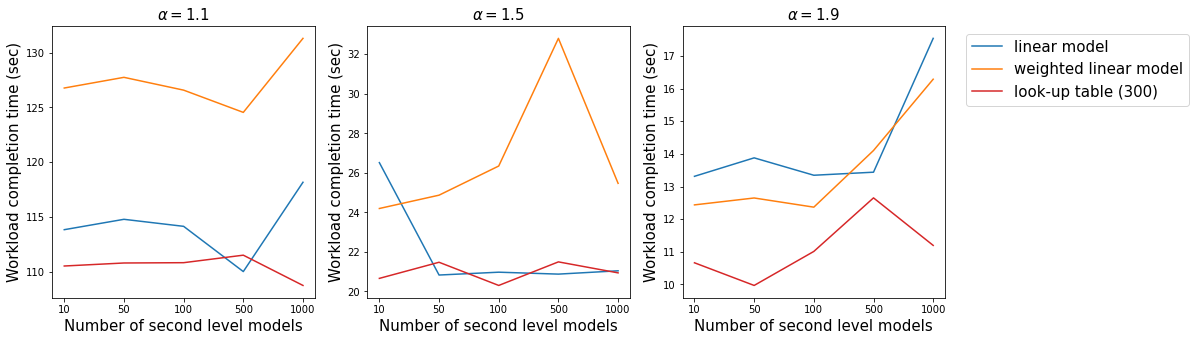

In [56]:
wiki_res = parse_results("results/wiki_200000k_v2.csv")
num_second_level_models = [10, 50, 100, 500, 1000]
# table_sizes = [100, 200, 300, 500]
table_sizes = [300, ]
alphas = [1.1, 1.5, 1.9]

fontsize = 15

# three plots: one for each alpha
# in each plot, one line for each model
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

x_dat = np.linspace(1, len(num_second_level_models), len(num_second_level_models))
for alpha, ax in zip(alphas, axs):
    ax.set_title("$\\alpha = {}$".format(alpha), fontsize=fontsize)
    ax.set_xlabel("Number of second level models", fontsize=fontsize)
    ax.set_ylabel("Workload completion time (sec)", fontsize=fontsize)

    # linear model
    lin_res = list()
    for nslm in num_second_level_models:
        _, rtime, _ = wiki_res[("linear_model", nslm, None, None, alpha)]
        lin_res.append(rtime)
    ax.plot(x_dat, lin_res, label="linear model", color="tab:blue")

    # weighted linear model
    wlin_res = list()
    for nslm in num_second_level_models:
        _, rtime, _ = wiki_res[("weighted_linear_model", nslm, None, alpha, alpha)]
        wlin_res.append(rtime)
    ax.plot(x_dat, wlin_res, label="weighted linear model", color="tab:orange")

    # look-up tables
    for tsize, color in zip(table_sizes, ["red", "brown", "pink", "olive"]):
        tlin_res = list()
        for nslm in num_second_level_models:
            _, rtime, _ = wiki_res[("look_up_table_linear_model", nslm, tsize, alpha, alpha)]
            tlin_res.append(rtime)
        ax.plot(x_dat, tlin_res, label="look-up table ({})".format(tsize), color="tab:{}".format(color))

    ax.set_xticks(x_dat)
    ax.set_xticklabels(num_second_level_models)

axs[-1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=fontsize)

plt.savefig("figs/wiki_evaluation.pdf")